<a href="https://colab.research.google.com/github/gayathri1462/Music-recommender/blob/main/Music_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


#music dataset has age and gender using which it will predict the genre 
#gender=1 represents male and gender=0 represents female
music_data = pd.read_csv("sample_data/music.csv")
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [16]:
X=music_data.drop(columns=["genre"])
Y=music_data["genre"]
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
score = accuracy_score(Y_test , predictions)
score

1.0

In [17]:
predict = model.predict([[21,1]])
predict

array(['HipHop'], dtype=object)

In [18]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

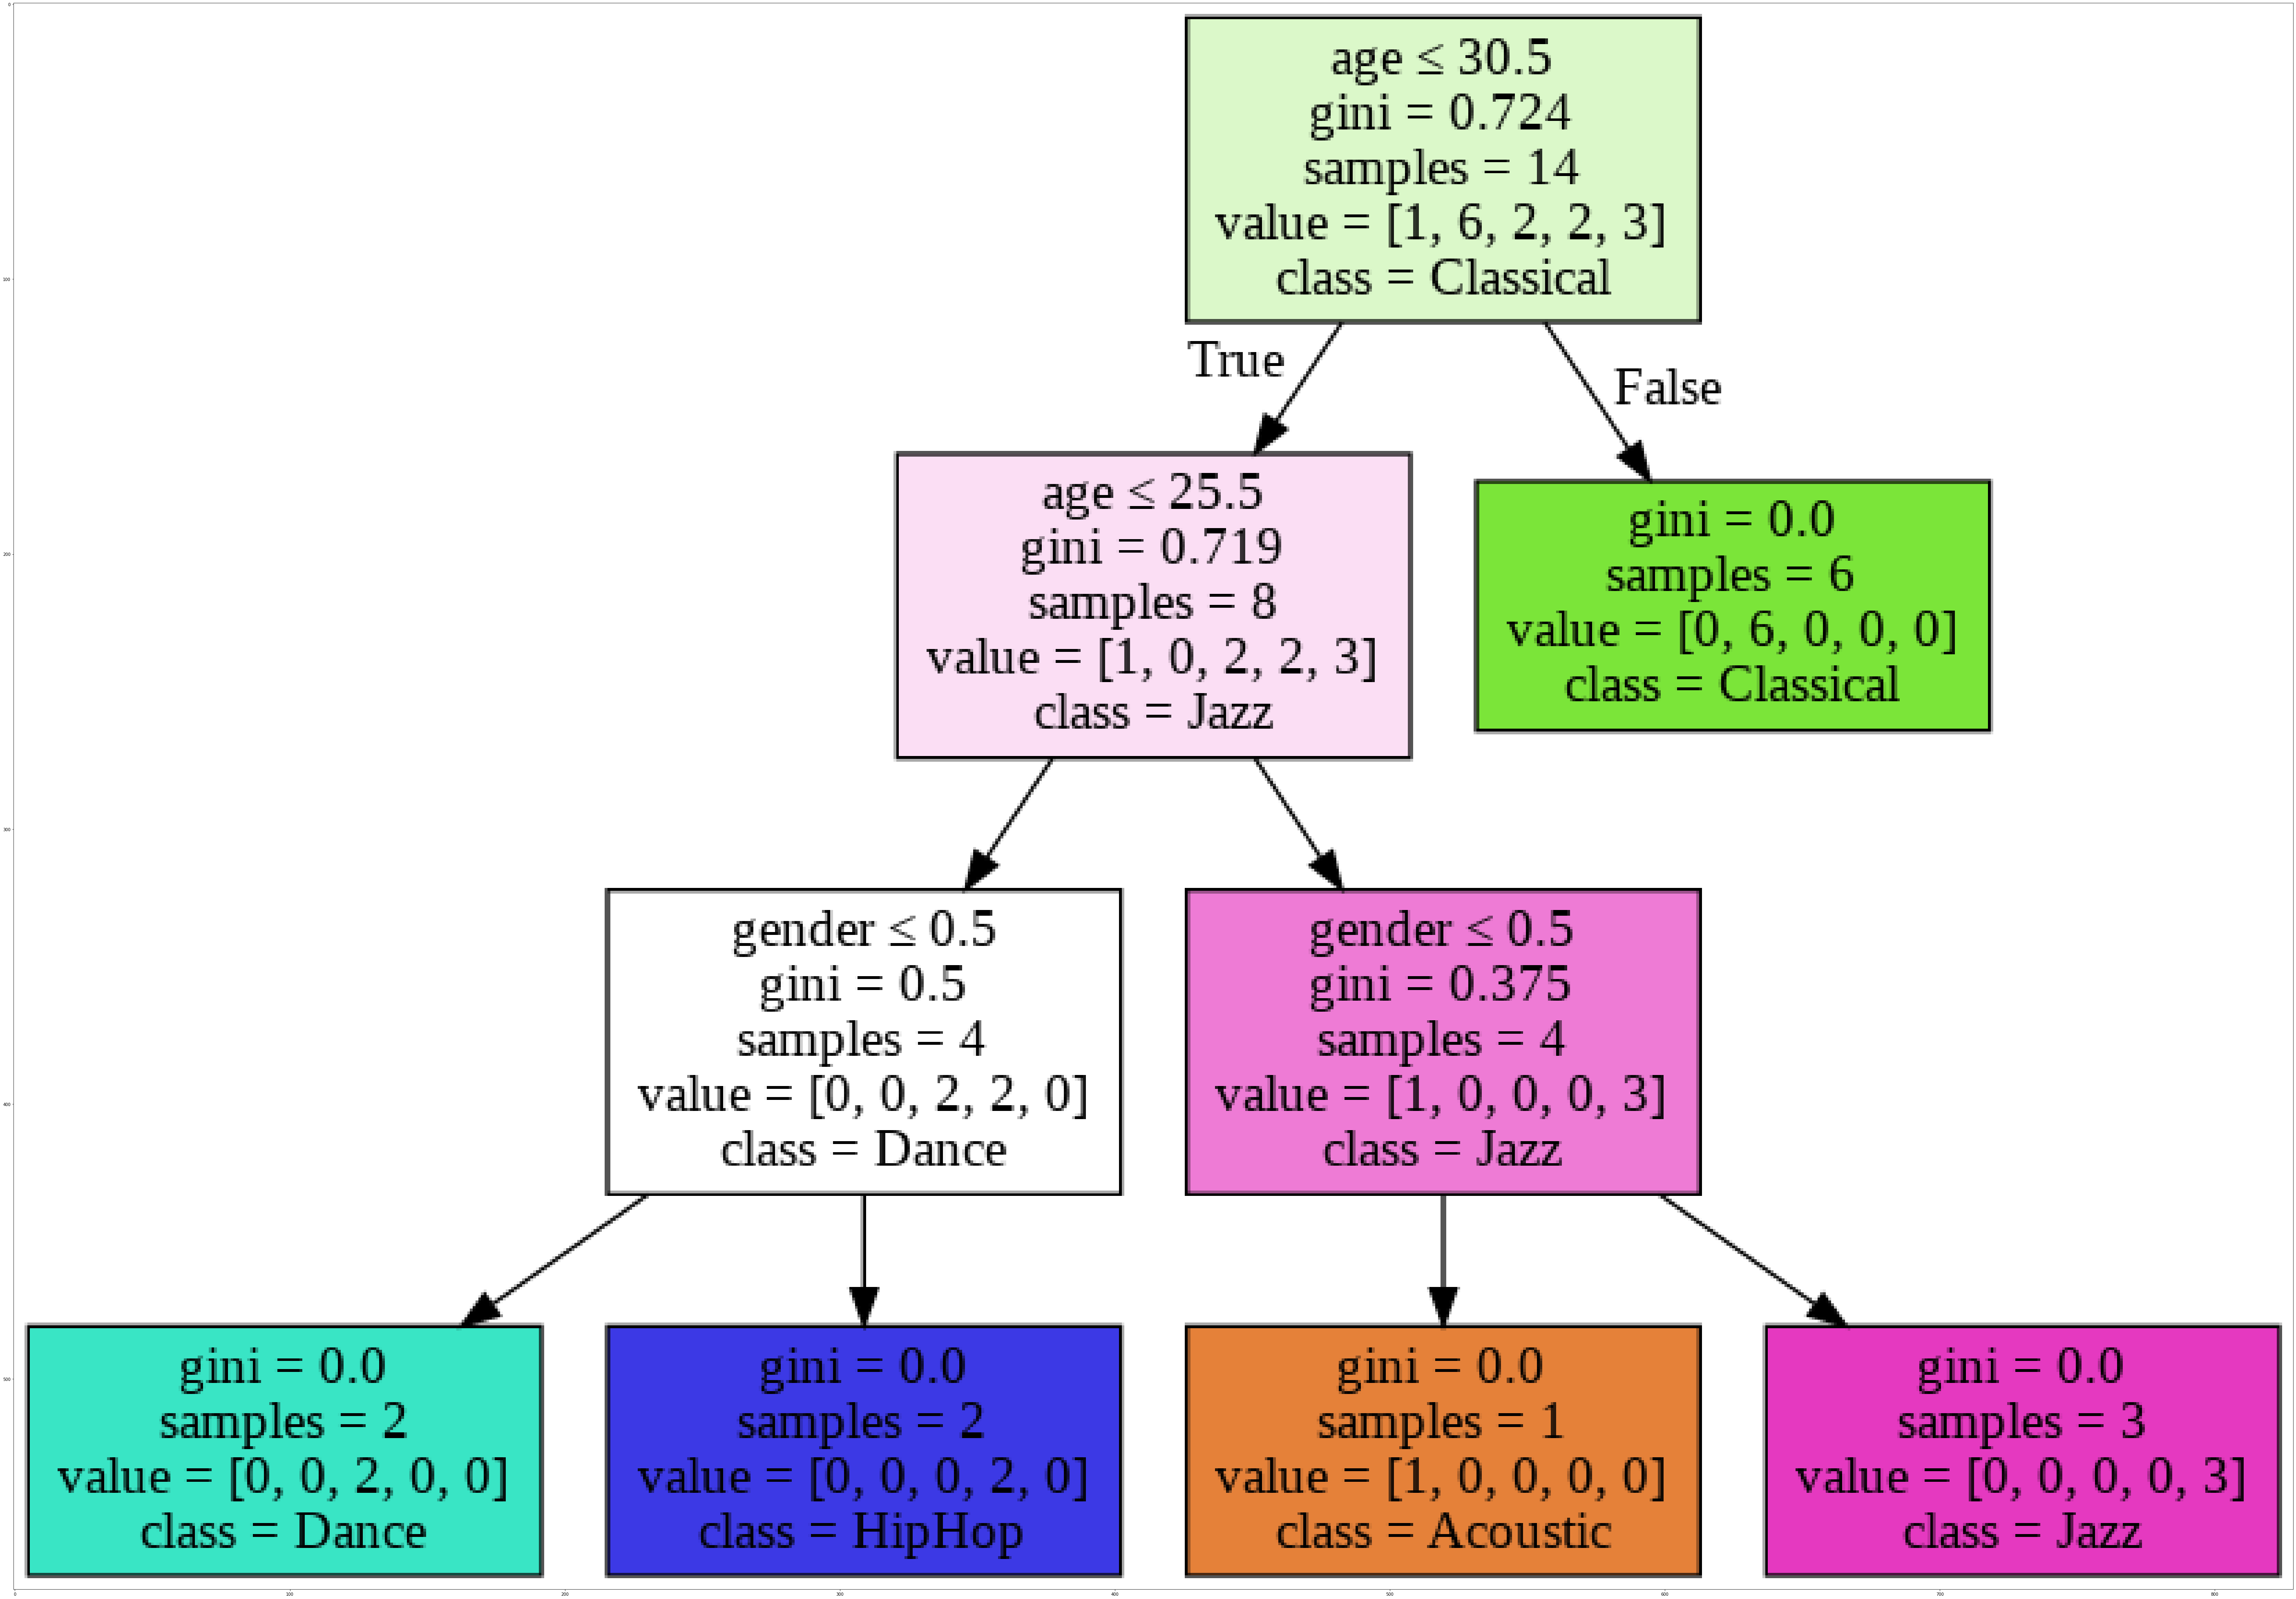

In [20]:
dot_data = StringIO()
filename = "music-recommender.png"
featureNames = music_data.columns[0:5]
targetNames = music_data["genre"].unique().tolist()
out=tree.export_graphviz(model,feature_names=["age", "gender"], out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 100))
plt.imshow(img,interpolation='nearest')